# Time Series Project

In this project we will deal with time series forecasting by creating a cpu usage anomaly detection model.

## Importing Libraries

In [37]:
### Load libraries and modules ###
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.offline as py
from prophet import Prophet
from prophet.plot import plot_plotly
from pmdarima.arima import auto_arima
from pylab import rcParams
plt.style.use('fivethirtyeight')

## Loading the dataset

In [3]:
# Loading the datasets
cpu_train_a_raw = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv')
cpu_train_b_raw = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv')
cpu_test_a_raw = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv')
cpu_test_b_raw = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv')

# Create a copy of the original datasets
cpu_train_a = cpu_train_a_raw.copy()
cpu_train_b = cpu_train_b_raw.copy()
cpu_test_a = cpu_test_a_raw.copy()
cpu_test_b = cpu_test_b_raw.copy()

## Data Exploration



In [4]:
cpu_train_a_raw.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  420 non-null    object 
 1   cpu       420 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB


In [5]:
cpu_train_a_raw.head(5)

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


In [6]:
cpu_train_b_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  600 non-null    object 
 1   cpu       600 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB


In [7]:
cpu_train_b_raw.head(5)

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


In [8]:
cpu_test_a_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  60 non-null     object 
 1   cpu       60 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [9]:
cpu_test_a_raw.head()

,datetime,cpu
0,2017-01-28 01:42:00,2.19
1,2017-01-28 01:43:00,1.97
2,2017-01-28 01:44:00,2.15
3,2017-01-28 01:45:00,1.94
4,2017-01-28 01:46:00,1.81


In [10]:
cpu_test_b_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  60 non-null     object 
 1   cpu       60 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [11]:
cpu_test_b_raw.head(5)

,datetime,cpu
0,2017-01-28 04:42:00,1.71
1,2017-01-28 04:43:00,1.58
2,2017-01-28 04:44:00,1.86
3,2017-01-28 04:45:00,1.66
4,2017-01-28 04:46:00,1.61


## Change the type in datetime column

In [12]:
#Convert the dataframe index to a datetime index 
cpu_train_a['datetime'] = pd.to_datetime(cpu_train_a['datetime'])
cpu_train_a = cpu_train_a.set_index('datetime')
cpu_train_b['datetime'] = pd.to_datetime(cpu_train_b['datetime'])
cpu_train_b = cpu_train_b.set_index('datetime')
cpu_test_a['datetime'] = pd.to_datetime(cpu_test_a['datetime'])
cpu_test_a = cpu_test_a.set_index('datetime')
cpu_test_b['datetime'] = pd.to_datetime(cpu_test_b['datetime'])
cpu_test_b = cpu_test_b.set_index('datetime')

In [13]:
print(cpu_train_a.info())
print("\n")
print(cpu_train_b.info())
print("\n")
print(cpu_test_a.info())
print("\n")
print(cpu_test_b.info())
print("\n")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 2017-01-27 18:42:00 to 2017-01-28 01:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     420 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB
None


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2017-01-27 18:42:00 to 2017-01-28 04:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     600 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB
None


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2017-01-28 01:42:00 to 2017-01-28 02:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes
None


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2017-01-28 04:42:00 to 2017-01-28 

## Data visualization

### Dataset A

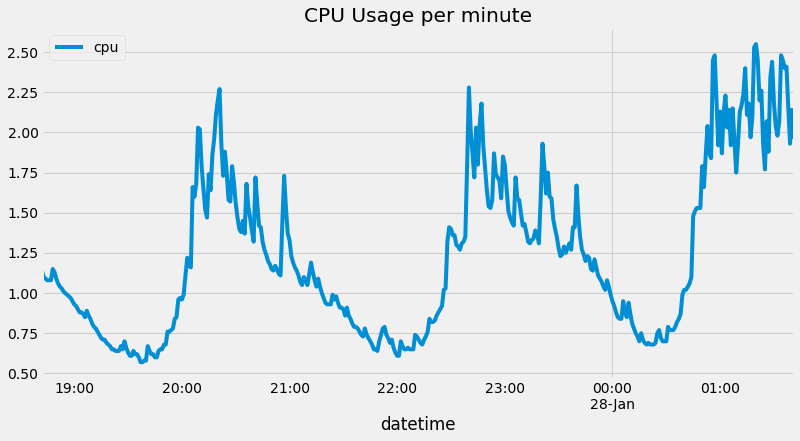

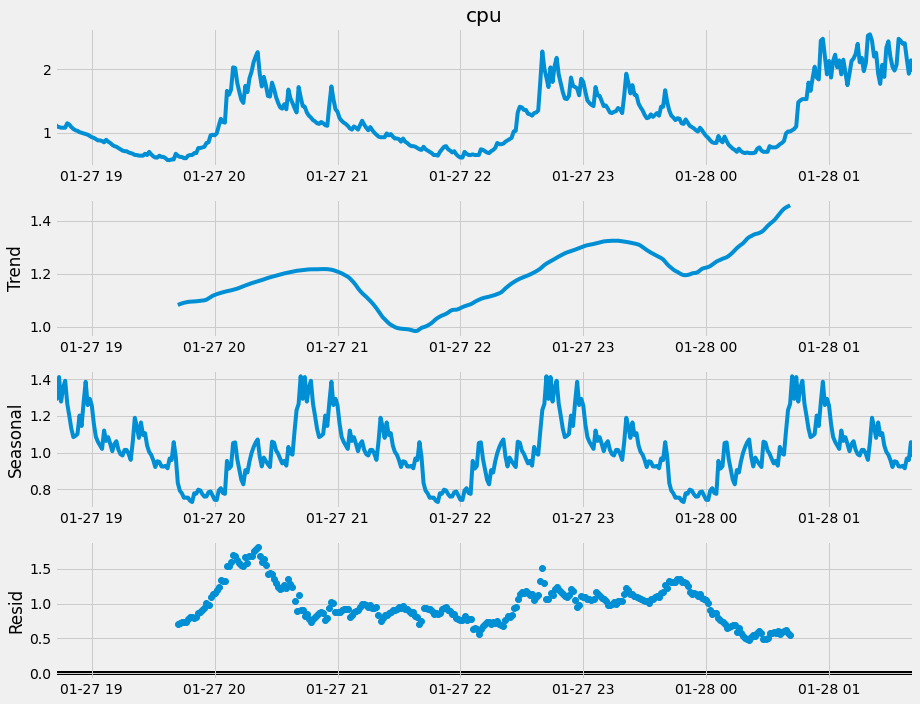

In [14]:
cpu_train_a.plot(title="CPU Usage per minute", figsize=(12,6))
plt.show()
print('\n')
rcParams['figure.figsize'] = 13, 10
decomposition = sm.tsa.seasonal_decompose(cpu_train_a['cpu'], model='multiplicative', period=120)
fig = decomposition.plot()
plt.show()

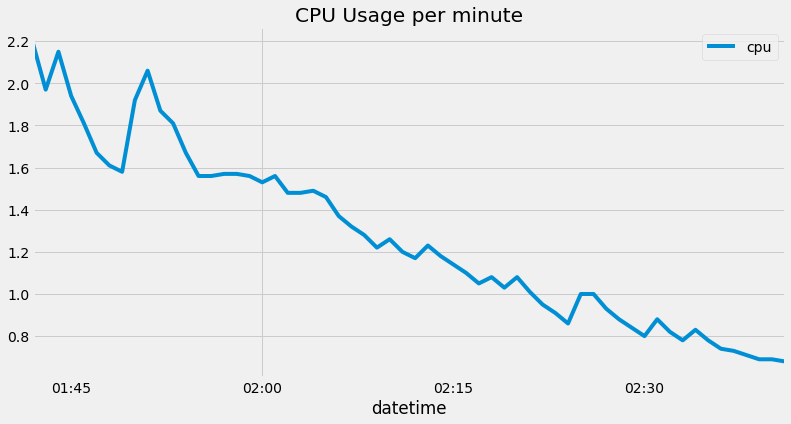

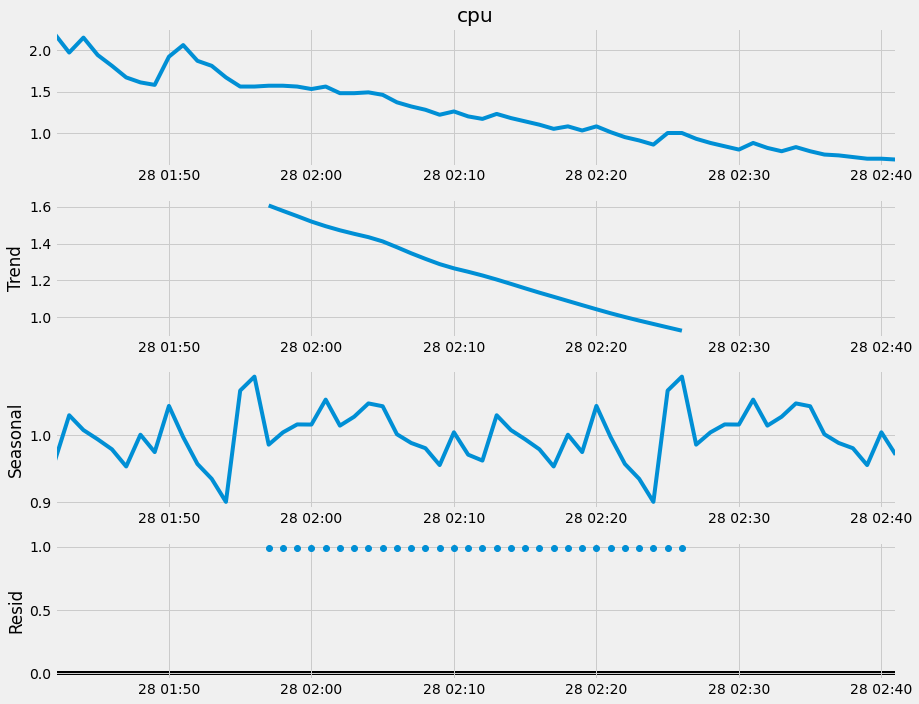

In [15]:
cpu_test_a.plot(title="CPU Usage per minute", figsize=(12,6))
plt.show()
print('\n')
rcParams['figure.figsize'] = 13, 10
decomposition = sm.tsa.seasonal_decompose(cpu_test_a['cpu'], model='multiplicative', period=30)
fig = decomposition.plot()
plt.show()

### Dataset B

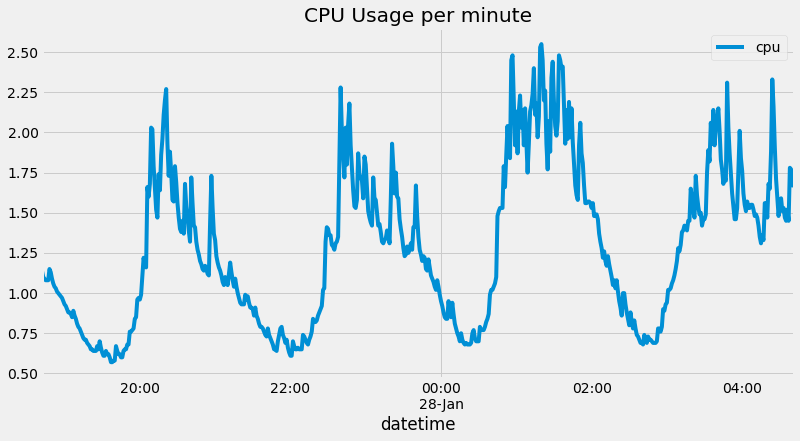

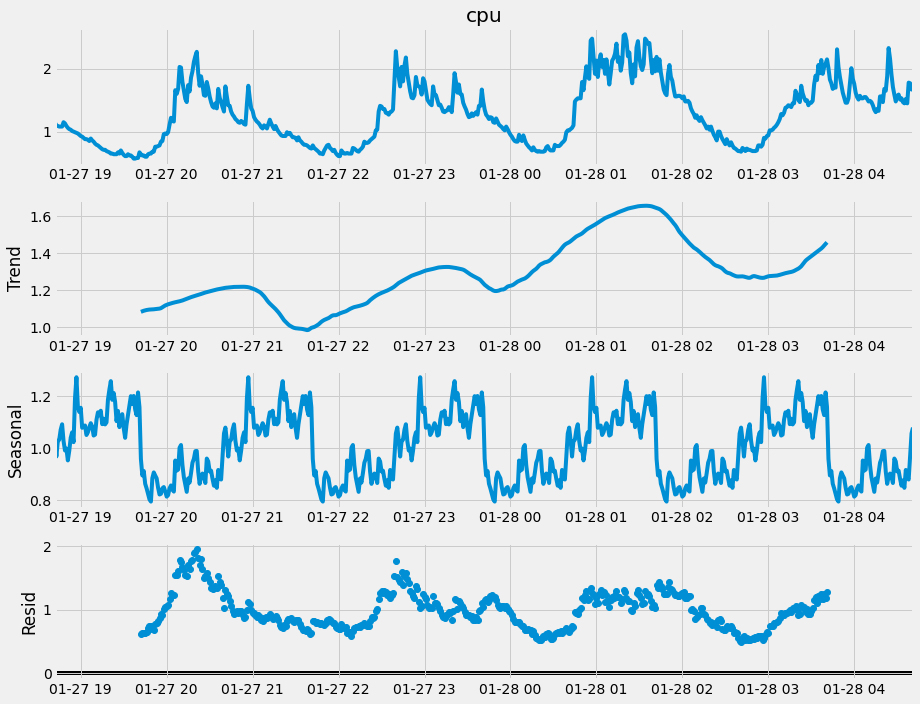

In [16]:
cpu_train_b.plot(title="CPU Usage per minute", figsize=(12,6))
plt.show()
print('\n')
rcParams['figure.figsize'] = 13, 10
decomposition = sm.tsa.seasonal_decompose(cpu_train_b['cpu'], model='multiplicative', period=120)
fig = decomposition.plot()
plt.show()

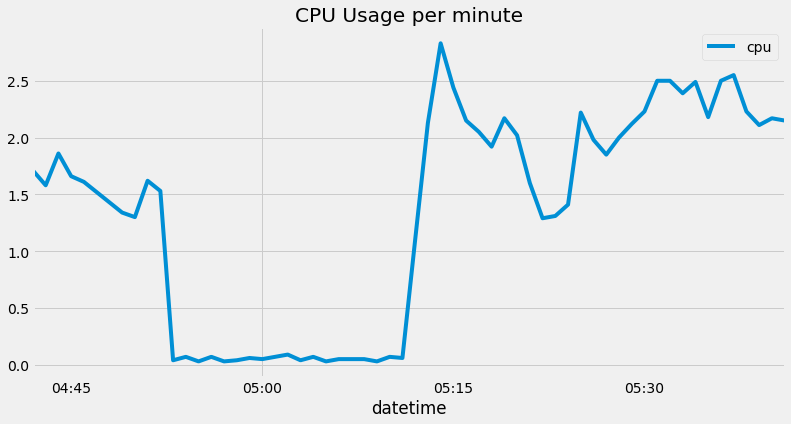

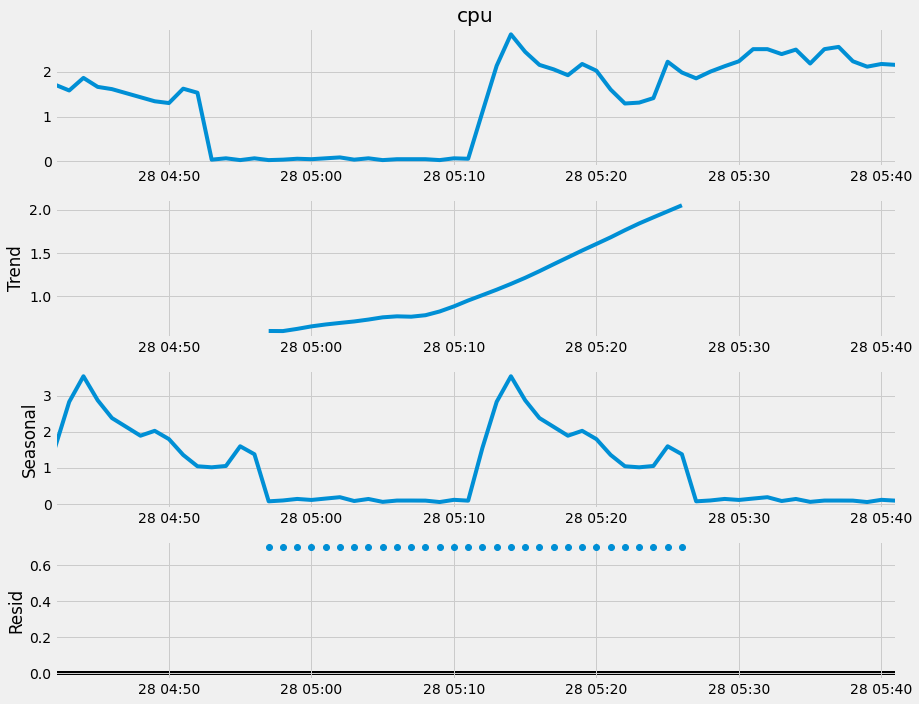

In [17]:
cpu_test_b.plot(title="CPU Usage per minute", figsize=(12,6))
plt.show()
print('\n')
rcParams['figure.figsize'] = 13, 10
decomposition = sm.tsa.seasonal_decompose(cpu_test_b['cpu'], model='multiplicative', period=30)
fig = decomposition.plot()
plt.show()

## Construction of the model and results

### Using ARIMA

#### Dataset A

In [18]:
stepwise_model_a = auto_arima(cpu_train_a, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_a.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.35 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-273.302, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-368.085, Time=0.92 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.18 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-271.465, Time=0.23 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-417.827, Time=2.34 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=12.25 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.03 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-419.762, Time=1.04 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-369.850, Time=0.31 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=6.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.13 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-417.860, Time=1.10 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-421.259, Time=2.32 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-373.

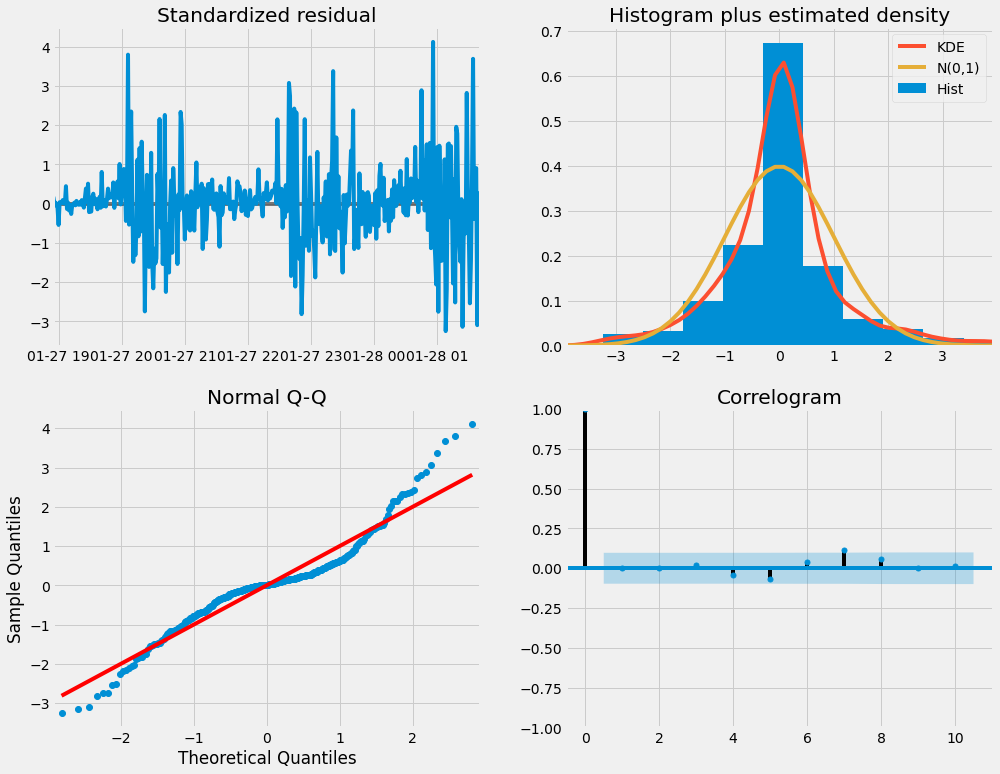

In [19]:
stepwise_model_a.fit(cpu_train_a).plot_diagnostics(figsize=(15, 12))
plt.show()

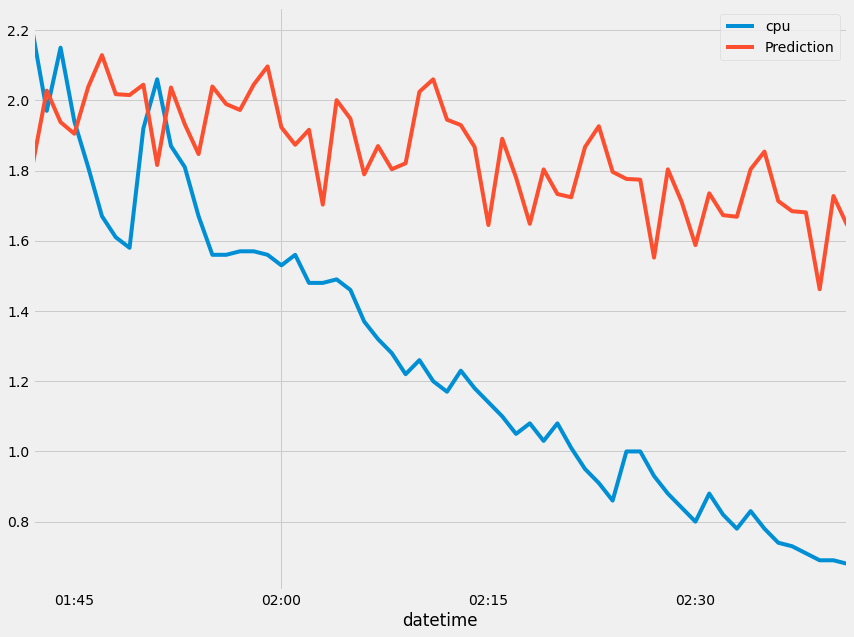

In [20]:
future_forecast = stepwise_model_a.predict(n_periods=60)
future_forecast = pd.DataFrame(future_forecast,index = cpu_test_a.index,columns=['Prediction'])
pd.concat([cpu_test_a,future_forecast],axis=1).plot()

#### Dataset B

In [21]:
stepwise_model_b = auto_arima(cpu_train_a, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_b.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.31 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-273.302, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-368.085, Time=0.42 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.98 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-271.465, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-417.827, Time=0.97 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.84 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.58 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-419.762, Time=0.97 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-369.850, Time=0.28 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=6.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.12 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-417.860, Time=1.02 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-421.259, Time=2.20 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-373.3

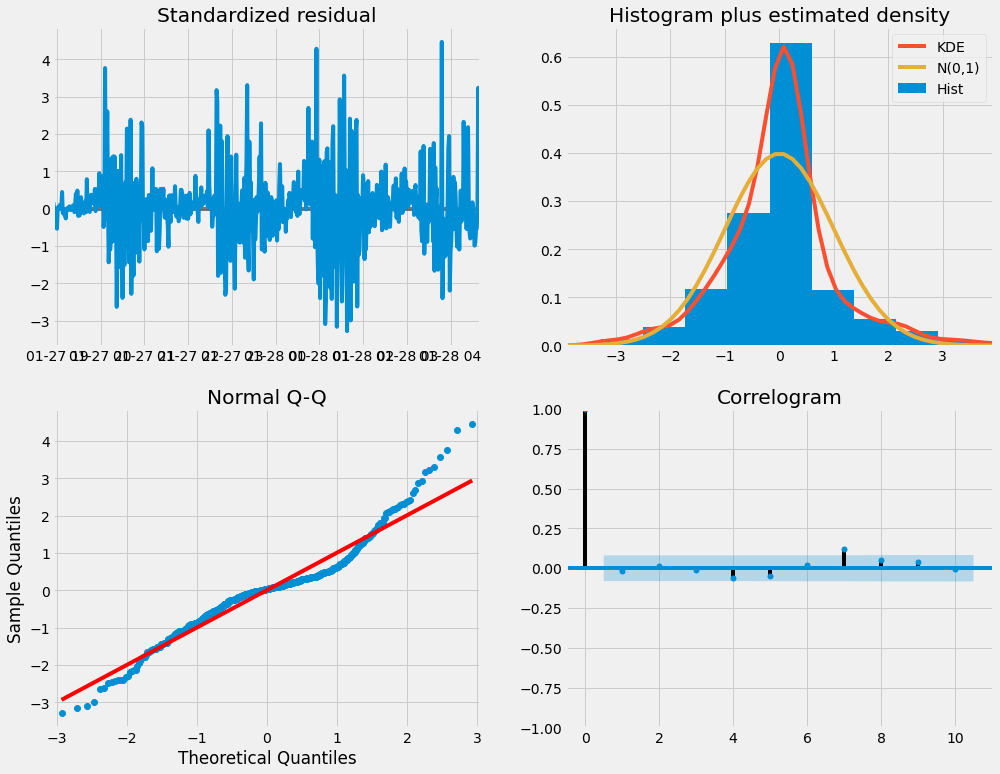

In [22]:
stepwise_model_b.fit(cpu_train_b).plot_diagnostics(figsize=(15, 12))
plt.show()

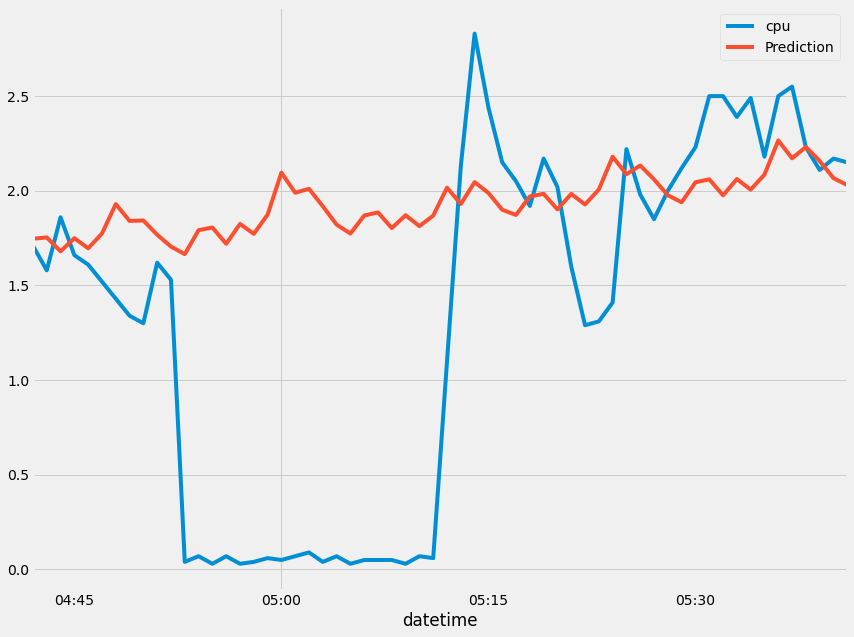

In [23]:
future_forecast = stepwise_model_b.predict(n_periods=60)
future_forecast = pd.DataFrame(future_forecast,index = cpu_test_b.index,columns=['Prediction'])
pd.concat([cpu_test_b,future_forecast],axis=1).plot()

### Using Prophet

#### Dataset A

In [24]:
# Rename the columns to use prophet
data_train_a = cpu_train_a_raw.copy()
data_train_a.rename(columns={'datetime': 'ds', 'cpu': 'y'}, inplace=True)

In [25]:
data_train_a.head(5)

,ds,y
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


In [26]:
m_a = Prophet()
m_a.fit(data_train_a)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpseaqwgms/oor_bi6w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpseaqwgms/4iyh7ybs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18935', 'data', 'file=/tmp/tmpseaqwgms/oor_bi6w.json', 'init=/tmp/tmpseaqwgms/4iyh7ybs.json', 'output', 'file=/tmp/tmptxhbh7lo/prophet_model-20220914053522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:35:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:35:23 - cmdstanpy - INFO - Chain [1] done processing
IN

In [27]:
# 1 minute period
future = m_a.make_future_dataframe(periods=1)
future.tail()

,ds
416,2017-01-28 01:38:00
417,2017-01-28 01:39:00
418,2017-01-28 01:40:00
419,2017-01-28 01:41:00
420,2017-01-29 01:41:00


In [28]:
forecast = m_a.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

                     ds       yhat  yhat_lower  yhat_upper
416 2017-01-28 01:38:00   2.034758    1.527764    2.573184
417 2017-01-28 01:39:00   2.043367    1.539950    2.585658
418 2017-01-28 01:40:00   2.051975    1.559113    2.552978
419 2017-01-28 01:41:00   2.060584    1.549088    2.569207
420 2017-01-29 01:41:00  14.456898    9.905880   19.399027


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpseaqwgms/pfai39wh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpseaqwgms/me2do00y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9797', 'data', 'file=/tmp/tmpseaqwgms/pfai39wh.json', 'init=/tmp/tmpseaqwgms/me2do00y.json', 'output', 'file=/tmp/tmp7974xbka/prophet_model-20220914053526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:35:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:35:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


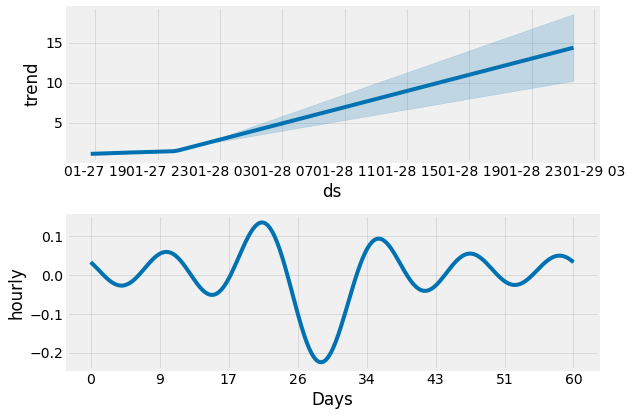

In [29]:
m_a = Prophet(weekly_seasonality=False)
m_a.add_seasonality(name='hourly', period=60, fourier_order=5)
forecast = m_a.fit(data_train_a).predict(future)
fig = m_a.plot_components(forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpseaqwgms/p86x6wng.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpseaqwgms/ry95v1y_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32669', 'data', 'file=/tmp/tmpseaqwgms/p86x6wng.json', 'init=/tmp/tmpseaqwgms/ry95v1y_.json', 'output', 'file=/tmp/tmp81f04wbl/prophet_model-20220914053530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:35:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:35:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


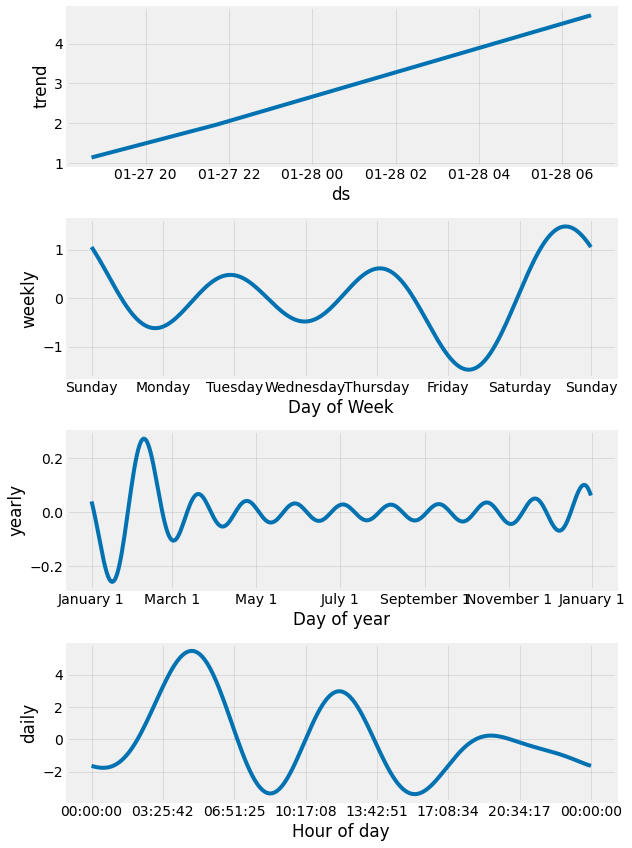

In [30]:
m_a = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True).fit(data_train_a)
future = m_a.make_future_dataframe(periods=300, freq='1min')
fcst = m_a.predict(future)
fig = m_a.plot_components(fcst)

#### Dataset B

In [31]:
# Rename the columns to use prophet
data_train_b = cpu_train_b_raw.copy()
data_train_b.rename(columns={'datetime': 'ds', 'cpu': 'y'}, inplace=True)

In [32]:
m_b = Prophet()
m_b.fit(data_train_b)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpseaqwgms/cd89ws3e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpseaqwgms/1nbv828i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7654', 'data', 'file=/tmp/tmpseaqwgms/cd89ws3e.json', 'init=/tmp/tmpseaqwgms/1nbv828i.json', 'output', 'file=/tmp/tmpdg0z9o7h/prophet_model-20220914053537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:35:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:35:37 - cmdstanpy - INFO - Chain [1] done processing
INF

In [33]:
# 1 minute period
future = m_b.make_future_dataframe(periods=1)
future.tail()

,ds
596,2017-01-28 04:38:00
597,2017-01-28 04:39:00
598,2017-01-28 04:40:00
599,2017-01-28 04:41:00
600,2017-01-29 04:41:00


In [34]:
forecast = m_b.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

                     ds      yhat  yhat_lower  yhat_upper
596 2017-01-28 04:38:00  1.599602    1.021251    2.146450
597 2017-01-28 04:39:00  1.600650    1.034427    2.210480
598 2017-01-28 04:40:00  1.601698    1.036225    2.201434
599 2017-01-28 04:41:00  1.602746    1.033350    2.132560
600 2017-01-29 04:41:00  3.112259    2.590020    3.669143


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpseaqwgms/q3bxizk1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpseaqwgms/ed685qlb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36546', 'data', 'file=/tmp/tmpseaqwgms/q3bxizk1.json', 'init=/tmp/tmpseaqwgms/ed685qlb.json', 'output', 'file=/tmp/tmpk_4xietv/prophet_model-20220914053540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:35:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:35:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


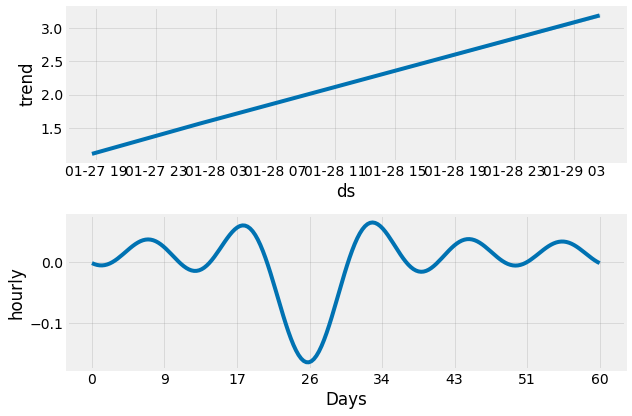

In [35]:
m_b = Prophet(weekly_seasonality=False)
m_b.add_seasonality(name='hourly', period=60, fourier_order=5)
forecast = m_b.fit(data_train_b).predict(future)
fig = m_b.plot_components(forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpseaqwgms/3pkfkoo4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpseaqwgms/7801gyil.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22883', 'data', 'file=/tmp/tmpseaqwgms/3pkfkoo4.json', 'init=/tmp/tmpseaqwgms/7801gyil.json', 'output', 'file=/tmp/tmpa_z7wxd6/prophet_model-20220914053544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:35:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:35:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


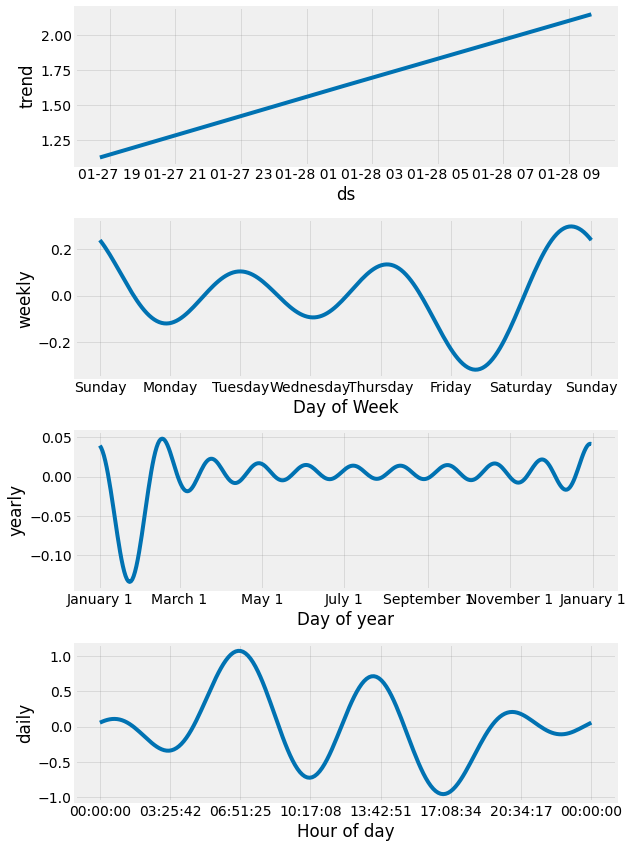

In [36]:
m_b = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True).fit(data_train_b)
future = m_b.make_future_dataframe(periods=300, freq='1min')
fcst = m_b.predict(future)
fig = m_b.plot_components(fcst)